In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:

def plot_metrics(file_path, table_name):
    
    data = pd.read_csv(file_path)
    models = ["TopPop", "UserKNN cosine", "ItemKNN cosine", "P3alpha", "RP3beta", "SpectralCF", "CMN"]
    metrics_set_1 = ["Novelty",  "UNEXP", "SEREND"]
    metrics_set_2 = ["Cov. Item","Div. MIL","Div. Gini"]
    filtered_data = data[data['model'].isin(models)]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    def plot_given_metrics(filtered_data, metrics, plot_title, axis):
        relevant_data = filtered_data[['model'] + metrics]
        melted_data = relevant_data.melt(id_vars='model', value_vars=metrics, var_name='Metric', value_name='Value')
        melted_data['Value'] = pd.to_numeric(melted_data['Value'], errors='coerce')
        barplot = sns.barplot(x='Metric', y='Value', hue='model', data=melted_data, dodge=True, ax=axis)
        for patch in barplot.patches:
            current_width = patch.get_width()
            new_width = current_width / 1.2
            patch.set_width(new_width)
            patch.set_x(patch.get_x() + new_width * 0.1)

        axis.set_title(f'Performance Metrics by Model: {plot_title}')
        axis.set_xlabel('Metric')
        axis.set_ylabel('Value')
        axis.legend(title='Model')
    plot_given_metrics(filtered_data, metrics_set_1, f'{table_name}', axes[0])
    plot_given_metrics(filtered_data, metrics_set_2, f'{table_name}', axes[1])
    plt.tight_layout()
    plt.show()



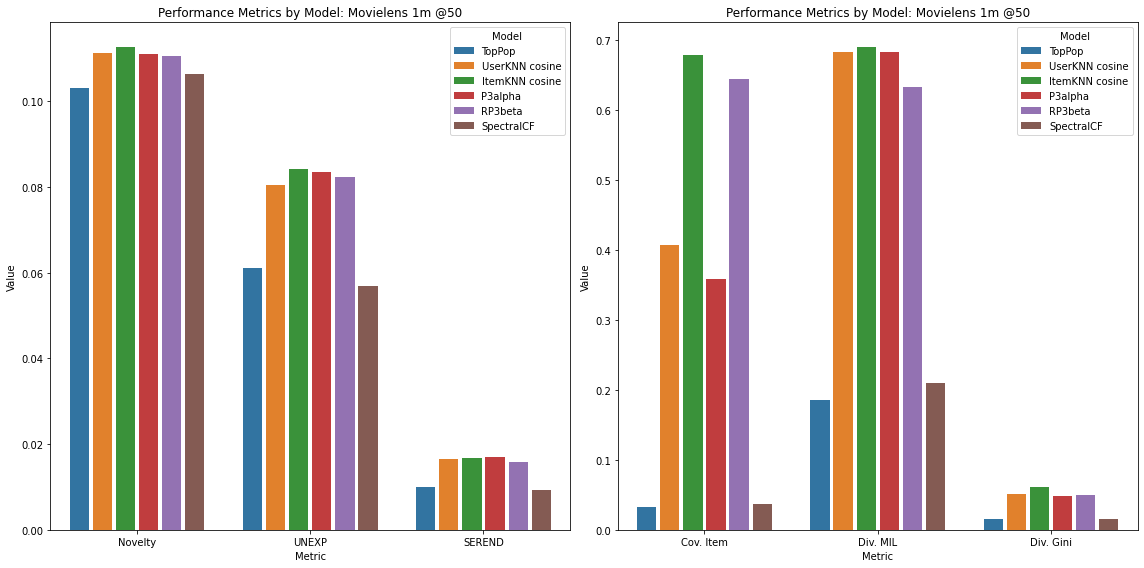

In [76]:
plot_metrics('movielens1m_all_metrics.csv', 'Movielens 1m @50')


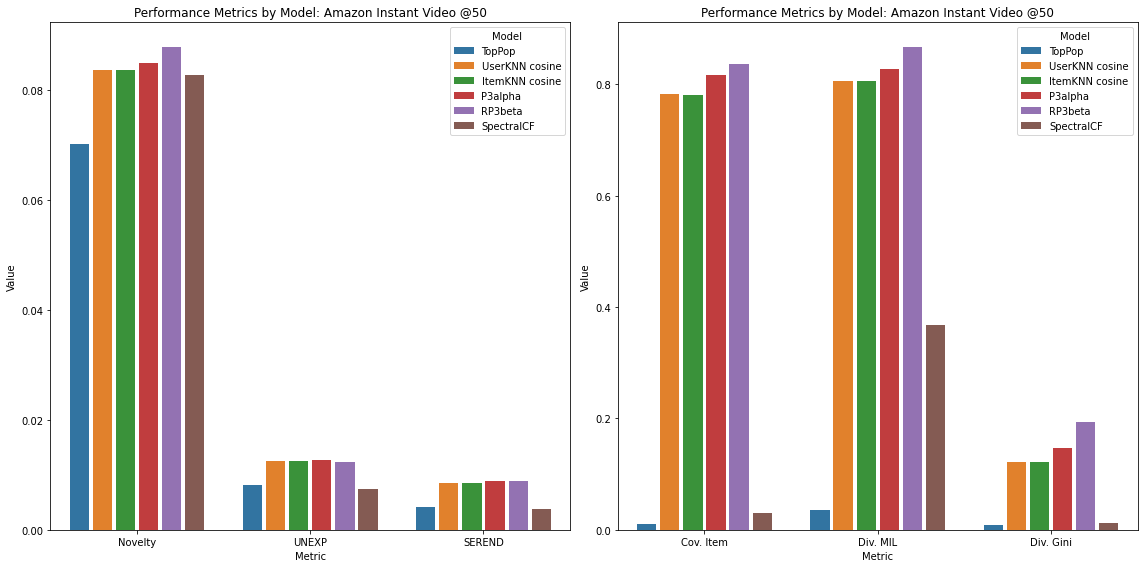

In [77]:
plot_metrics('amazon_instant_video_all_metrics.csv', 'Amazon Instant Video @50')

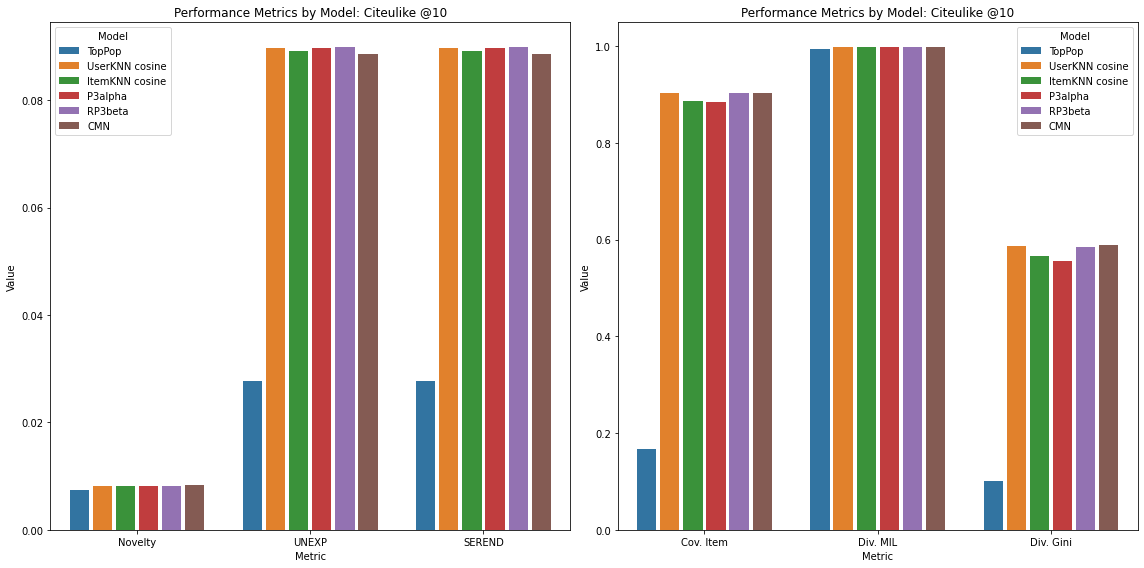

In [80]:
plot_metrics('CMN_citeulike_all_metrics.csv', 'Citeulike @10')

In [120]:

def plot_metrics(file_path, is_last_model_spectralCF=True):
    df = pd.read_csv(file_path)
    order = ['@ 20', '@ 40', '@ 60', '@ 80', '@ 100']
    df['recommendation'] = pd.Categorical(df['recommendation'], categories=order, ordered=True)
    models = ['TopPop', 'UserKNN cosine', 'ItemKNN cosine', 'P3alpha', 'RP3beta']
    models.append('SpectralCF' if is_last_model_spectralCF else 'CMN')
    df_filtered = df[df.columns.intersection(['recommendation', 'metric'] + models)]
    metrics = ["MAP", "Novelty", "CovItem", "DivMIL", "UNEXP", "SEREND"]
    fig, axes = plt.subplots(2, 3, figsize=(15, 12))
    axes = axes.flatten()
    for i, metric in enumerate(metrics):
        df_metric = df_filtered[df_filtered['metric'] == metric]
        for model in models:
            sns.lineplot(data=df_metric, x='recommendation', y=model, ax=axes[i], label=model if i == 0 else "", legend=False)
        
        axes[i].set_title(f'Metric: {metric}')
        axes[i].set_xlabel('Recommendation')
        axes[i].set_ylabel(metric)
    
    fig.legend(labels=models, loc='upper center', ncol=len(models), bbox_to_anchor=(0.5, 1.05), fontsize='large')
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])  
    plt.show()



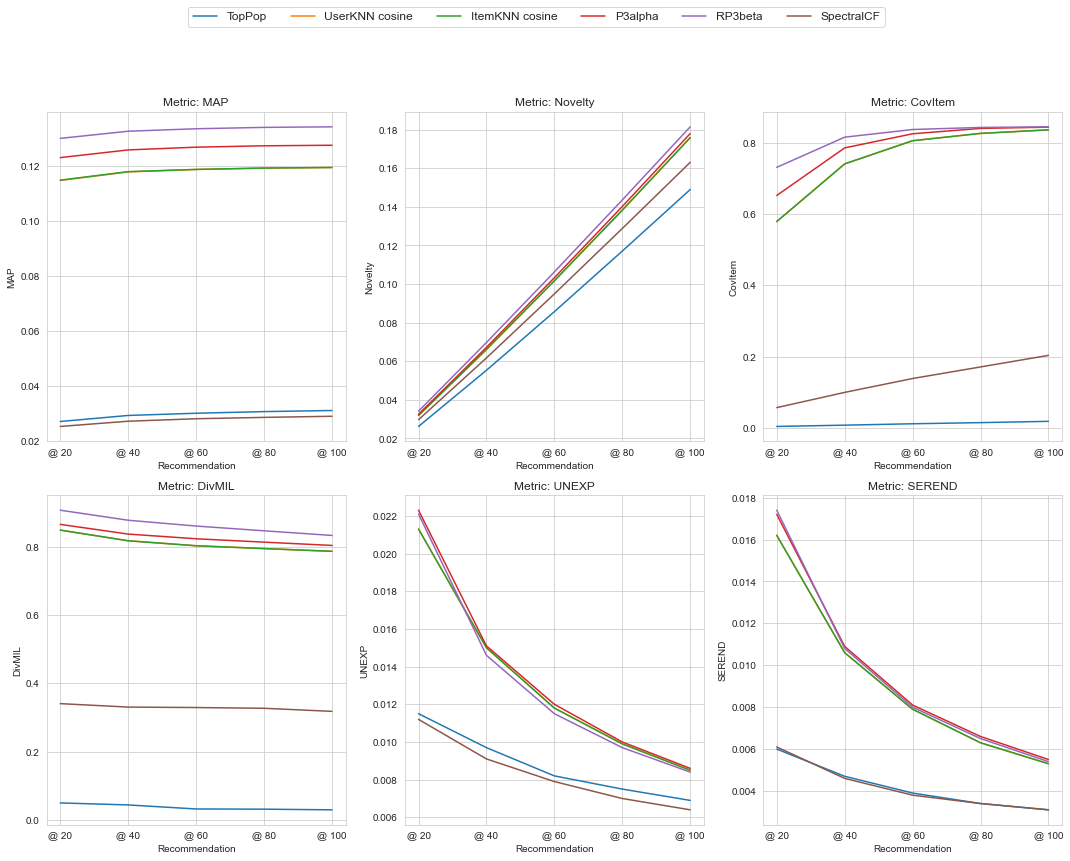

In [121]:
plot_metrics('cutoff_amazon_instant_video_article_metrics_latex_results.csv', is_last_model_spectralCF=True)